In [1]:
%matplotlib inline

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw(folder, loss_range=[0, 10]):
    losses = pickle.load(open(os.path.join(folder, "saved_loss.p"), "rb"))
    x = np.squeeze(np.asarray(losses["X"]))
    train_loss = np.squeeze(np.asarray(losses["Y"]))
    val_loss = np.squeeze(np.asarray(losses["Y_test"]))
    
    plt.figure()
    plt.grid()
    axes = plt.gca()
    axes.set_ylim(loss_range)
    plt.title('Loss')
    plt.plot(x, train_loss, label='train')
    plt.plot(x, val_loss, label='val')
    plt.legend()
    
    accuracy = pickle.load(open(os.path.join(folder, "saved_accuracy.p"), "rb"))
    x2 = np.squeeze(np.asarray(accuracy["X"]))
    P = accuracy["P"]
    M = accuracy["M"]
    I = accuracy["I"]
    Ptest = accuracy["P_test"]
    Mtest = accuracy["M_test"]
    Itest = accuracy["I_test"]
    
    plt.figure()
    plt.grid()
    plt.title('Avg pixel accuracy')
    plt.plot(x2, P, label='train')
    plt.plot(x2, Ptest, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('Mean class accuracy')
    plt.plot(x2, M, label='train')
    plt.plot(x2, Mtest, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('mIoU')
    plt.plot(x2, I, label='train')
    plt.plot(x2, Itest, label='val')
    plt.legend()
    

In [3]:
def draw_im(folder, im_list):
    for im in im_list:
        image = pickle.load(open(os.path.join(folder, im), 'rb'))
        image = image.transpose([1,2,0])
        print(image.shape)
        plt.figure()
        plt.title(im)
        plt.imshow(image)

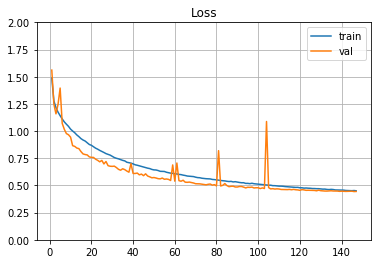

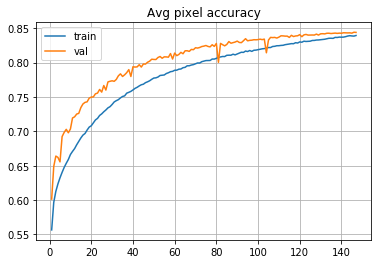

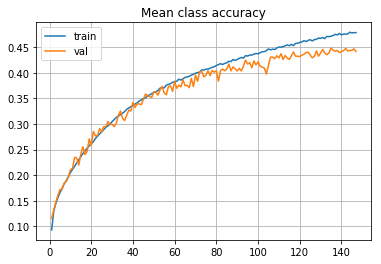

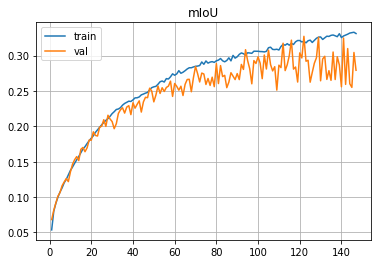

In [54]:
draw('results_lip', loss_range=[0,2])

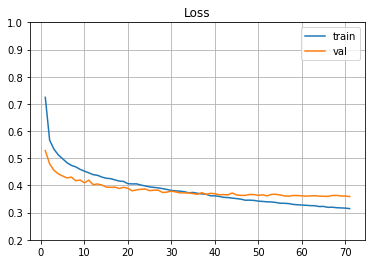

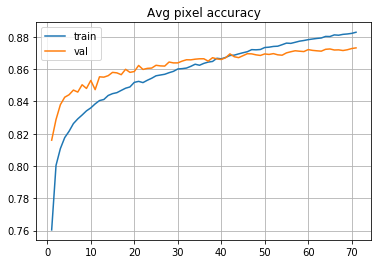

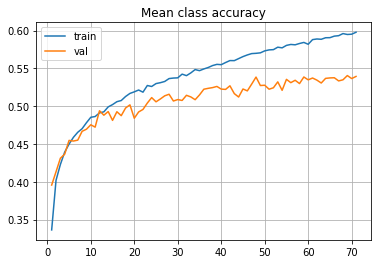

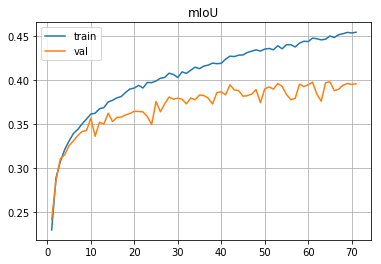

In [56]:
draw('results_lip_pretrained', loss_range=[0.2,1])

In [62]:
data = [-57, -53, -54, -57, -58, -64, -76, -73, -66, -68, -68, -68, -71, -71, -72, -71, -59, -59, -59, -60, -63, -60, -59, -60, -59, -62, -62, -53, -52, -52, -52, -53, -56, -57, -59, -57, -53, -65, -64, -64, -64, -63, -66, -72, -66, -65, -64, -65, -68, -70, -69, -70, -70, -70, -67, -69, -69, -63, -63, -67, -51, -50, -60, -53, -62, -53, -53, -63, -63, -62, -62, -61, -62, -62, -60, -60, -59, -61, -55, -59, -60, -70, -54, -55, -53, -59, -66, -68, -64, -53, -52, -62, -63, -63, -55, -54, -55, -53, -52, -55, -55, -56, -55, -50, -55, -55, -56, -53, -58, -56, -58, -56, -53, -56, -55, -56, -56, -53, -52, -52, -55, -56, -55, -55, -55, -55, -55, -55, -55, -56, -53, -55, -56, -56, -55, -55, -55, -56, -60, -59, -57, -56, -55, -55, -55, -56, -55, -55, -55, -55, -55, -55, -55, -56, -55, -59, -59, -52, -53, -54, -52, -52, -52, -54, -54, -54, -52, -52, -52, -51, -61, -60, -60, -51, -51, -51, -52, -52, -51, -51, -51, -51, -51, -51, -51, -51, -51, -51, -51, -51, -52, -49, -48, -52, -51, -52, -50, -51, -52, -53, -53, -51, -51, -52, -52, -64, -52, -52, -52, -52, -52, -52, -56, -51, -51, -50, -50, -49, -51, -51, -51, -49, -51, -48, -49, -48, -65, -62, -62, -62, -60, -63, -63, -60, -59, -57, -61, -55, -51, -53, -55, -67, -61, -61, -61, -71, -65, -65, -68, -68, -57, -49, -50, -48, -47, -52, -53, -60, -61, -54, -63, -58, -59, -48, -51, -48, -52, -52, -54, -58, -51, -51, -51, -51, -51, -51, -51, -51, -50, -51, -58, -53, -52, -49, -47, -60, -59, -52, -52, -51, -51, -51, -51, -51, -59, -59, -64, -60, -60, -58, -58, -59, -62, -63, -52, -52, -51, -52, -51, -51, -52, -49, -54, -52, -52, -51, -51, -51, -51, -66, -61, -60, -55, -60, -60, -62, -49, -51, -51, -54, -52, -52, -52, -52, -51, -52, -52, -52, -60, -60, -54, -51, -52, -53, -55, -50, -51, -52, -52, -51, -51, -51, -51, -51, -51, -51, -71, -56, -53, -50, -48, -55, -59, -59, -52, -52, -52, -52, -52, -52, -52, -51, -51, -52, -52, -59, -58, -53, -58, -59, -50, -52, -52, -52, -52, -51, -52, -51, -52, -51, -63, -66, -51, -49, -53, -53, -56, -56, -67, -58, -59, -59, -59, -59, -59, -59, -58, -59, -59, -58, -58, -68, -66, -67, -58, -68, -59, -58, -59, -59, -59, -59, -59, -59, -59, -59, -59, -59, -67, -59, -59, -70, -62, -71, -62, -69, -69, -73, -60, -60, -59, -62, -69, -69, -69, -69, -69, -69, -67, -68, -68, -67, -68, -71, -69, -67, -68, -68, -67, -67, -68, -67, -68, -67, -67, -68, -70, -67, -70, -70, -70, -71, -68, -67, -67, -68, -67, -68, -67, -69, -68, -74, -68, -71, -71, -72, -70, -68, -74, -69, -69, -69, -69, -69, -69, -68, -65, -65, -70, -69, -67, -68, -67, -69, -69, -66, -67, -51, -60, -61, -53, -56, -53, -54, -53, -53, -53, -59, -58, -53, -51, -53, -53, -52, -52, -53, -52, -52, -52, -52, -52, -53, -53, -53, -52, -53, -53, -53, -53, -53, -53, -56, -53, -52, -56, -53, -51, -51, -54, -75, -53, -55, -56, -55, -55, -52, -56, -56, -59, -55, -51, -51, -50, -56, -56, -50, -50, -56, -59, -49, -56, -53, -52, -53, -53, -53, -53, -51, -54, -53, -53, -56, -53, -53, -53, -57, -55, -58, -57, -57, -55, -61, -56, -57, -57, -57, -56, -55, -56, -55, -54, -53, -54, -53, -64, -65, -85, -87, -61, -61, -61, -57, -58, -56, -60, -64, -61, -59, -53, -88, -53, -61, -60, -56, -53, -55, -53, -53, -53, -53, -54, -53, -54, -53, -53, -71, -53, -53, -53, -53, -53, -53, -53, -53, -52, -53, -53, -53, -53, -52, -59, -63, -60, -60, -59, -59, -60, -72, -73, -59, -68, -67, -61, -71, -70, -59, -59, -59, -68, -60, -71, -69, -71, -60, -67, -61, -67, -66, -61, -66, -59, -59, -60, -60, -60, -59, -63, -59, -62, -62, -63, -64, -61, -61, -62, -62, -61, -61, -60, -61, -62, -56, -70, -70, -66, -57, -57, -57, -59, -60, -67, -67, -58, -66, -67, -57, -61, -58, -62, -60, -60, -57, -58, -58, -57, -60, -59, -59, -57, -57, -59, -65, -65, -69, -68, -69, -69, -67, -57, -58, -59, -58, -59, -59, -60, -59, -59, -59, -57, -57, -58, -58, -61, -59, -61, -62, -60, -60, -61, -61, -62, -62, -62, -62, -63, -62, -62, -62, -63, -62, -63, -63, -62, -62, -62, -62, -61, -61, -62, -61, -60, -68, -60, -59, -56, -59, -59, -59, -64, -60, -59, -57, -60, -59, -60, -59, -60, -57, -61, -61, -61, -61, -57, -57, -56, -56, -59, -56, -61, -58, -67, -67, -53, -53, -53, -59, -54, -57, -56, -56, -56, -56, -57, -57, -56, -56, -55, -56, -67, -57, -56, -56, -57, -56, -59, -57, -54, -57, -56, -57, -57, -58, -59, -57, -57, -59, -59, -58, -59, -56, -56, -55, -55, -55, -56, -55, -55, -63, -63, -59, -62, -60, -64, -64, -56, -55, -55, -53, -56, -55, -53, -56, -55, -55, -55, -57, -54, -57, -59, -59, -57, -57, -57, -59, -55, -57, -57, -57, -56, -56, -56, -57, -56, -56, -54, -56, -57, -56, -59, -59, -59, -58, -59, -56, -59, -59, -58, -55, -55, -56, -56, -55, -55, -55, -55, -55, -55, -55, -55, -57, -56, -56, -52, -53, -56, -57, -57, -57, -57, -56, -56, -56, -56, -56, -56, -53, -56, -56, -57, -56, -57, -56, -57, -58, -58, -58, -57, -58, -57, -57, -57, -59, -56, -53, -60, -56, -54, -62, -62, -87, -57, -61, -61, -59, -59, -62, -62, -49, -52, -55, -56, -59, -59, -57, -53, -53, -53, -55, -54, -53, -54, -63, -63, -53, -53, -52, -52, -49, -52, -51, -51, -51, -52, -52, -52, -52, -52, -53, -53, -52, -40, -43, -44, -46, -47, -48, -59, -59, -59, -59, -58, -51, -51, -52, -53, -52, -53, -54, -67, -67, -52, -54, -54, -53, -55, -54, -53, -52, -52, -51, -51, -51, -51, -59, -57, -56, -53, -55, -57, -55, -59, -50, -53, -58, -60, -65, -63, -66, -59, -62, -59, -57, -61, -68, -68, -72, -76, -79, -81, -75, -74, -76, -75, -75, -80, -77, -76, -89, -68, -72, -74, -71, -88, -89, -76, -75, -77, -76, -75, -72, -79, -78, -74, -74, -75, -83, -81, -88, -88, -84, -85, -87, -89, -85, -87, -88, -86, -77, -76, -73, -70, -68, -72, -67, -71, -63, -61, -63, -64, -62, -63, -57, -57, -62, -67, -60, -62, -60, -59, -61, -64, -63, -63, -63, -65, -64, -63, -63, -63, -63, -59, -59, -59, -59, -63, -63, -64, -60, -59, -59, -58, -64, -63, -63, -58, -59, -59, -59, -65, -64, -66, -61, -64, -64, -59, -41, -38, -40, -39, -48, -42, -39, -39, -41, -41, -43, -47, -47, -67, -36, -26, -45, -35, -45, -35, -34, -39, -36, -38, -39, -39, -33, -30, -29, -41, -38, -33, -35, -36, -39, -41, -41, -38, -35, -35, -40, -40, -41, -42, -41, -41, -44, -53, -30, -32, -31, -34, -35, -38, -38, -32, -31, -33, -33, -33, -34, -33, -36, -36, -32, -31, -33, -36, -35, -35, -37, -41, -41, -44, -44, -59, -36, -41, -41, -41, -41, -40, -41, -41, -42, -45, -68, -68, -49, -46, -41, -47, -45, -45, -41, -41, -40, -41, -38, -42, -39, -39, -39, -41, -44, -44, -44, -44, -43, -38, -40, -43, -45, -45, -51, -52, -53, -53, -52, -51, -50, -45, -44, -44, -46, -47, -47, -46, -44, -42, -44, -61, -61, -60, -66, -67, -64, -63, -63, -64, -54, -55, -60, -59, -60, -57, -56, -57, -59, -59, -60, -64, -60, -60, -61, -61, -61, -61, -66, -67, -59, -58, -59, -59, -59, -57, -59, -59, -59, -59, -59, -59, -59, -59, -59, -59, -59, -60, -59, -60, -61, -62, -58, -59, -58, -54, -58, -56, -60, -59, -59, -59, -59, -57, -67, -61, -61, -61, -62, -66, -65, -59, -60, -60, -59, -59, -59, -56, -56, -59, -59, -56, -54, -56, -56, -56, -57, -57, -58, -57, -65, -59, -59, -59, -59, -59, -59, -59, -61, -61, -61, -61, -61, -61, -61, -65, -65, -61, -59, -64, -58, -62, -64, -58, -60, -61, -59, -58, -59, -59, -59, -61, -61, -61, -58, -61, -59, -59, -61, -55, -55, -51, -54, -55, -61, -62, -60, -59, -59, -59, -59, -60, -60, -64, -65, -59, -67, -60, -67, -59, -64, -63, -64, -64, -59, -59, -59, -59, -59, -61, -59, -59, -62, -62, -62, -64, -63, -63, -61, -63, -90, -63, -68, -65, -68, -64, -64, -64, -67, -68, -62, -61, -61, -61, -61, -61, -61, -64, -64, -64, -64, -66, -65, -59, -60, -59, -61, -61, -61, -61, -61, -60, -61, -59, -59, -61, -58, -61, -56, -64, -59, -57, -55, -54, -58, -54, -61, -60, -60, -60, -60, -60, -60, -61, -61, -60, -61, -61, -61, -59, -59, -60, -59, -60, -61, -61, -61, -60, -61, -60, -60, -59, -60, -63, -61, -59, -59, -58, -63, -64, -59, -60, -60, -60, -60, -60, -60, -60, -60, -59, -61, -60, -60, -60, -62, -62, -65, -64, -61, -61, -58, -58, -57, -62, -61, -61, -58, -63, -66, -57, -58, -61, -57, -56, -56, -56, -58, -58, -59, -57, -59, -59, -59, -59, -59, -59, -59, -59, -59, -59, -59, -57, -57, -57, -57, -57, -57, -59, -60, -56, -57, -57, -56, -56, -57, -57, -57, -56, -56, -57, -56, -59, -59, -65, -65, -74, -55, -57, -59, -56, -56, -57, -58, -56, -65, -65, -58, -64, -61, -56, -58, -58, -59, -59, -59, -65, -64, -66, -56, -56, -56, -56, -56, -56, -57, -59, -59, -57, -56, -57, -59, -56, -59, -58, -59, -59, -55, -56, -56, -62, -68, -70, -56, -62, -56, -56, -57, -62, -57, -56, -56, -56, -57, -57, -57, -90, -56, -56, -56, -56, -56, -65, -56, -56, -55, -55, -55, -55, -66, -55, -69, -56, -55, -55, -55, -55, -55, -55, -54, -55, -55, -57, -57, -57, -57, -59, -59, -56, -57, -57, -56, -56, -56, -57, -57, -57, -65, -56, -57, -56, -56, -56, -66, -66, -59, -59, -59, -59, -57, -67, -59, -56, -59, -59, -57, -57, -64, -59, -53, -56, -56, -56, -57, -57, -56, -56, -54, -49, -56, -55, -56, -57, -57, -56, -56, -56, -56, -56, -57, -56, -56, -56, -57, -56, -56, -57, -57, -56, -54, -55, -56, -56, -52, -53, -55, -55, -56, -56, -57, -57, -64, -56, -56, -54, -57, -58, -57, -58, -56, -56, -55, -53, -54, -55, -54, -56, -56, -54, -53, -54, -56, -60, -53, -51, -52, -52, -56, -59, -59, -56, -55, -56, -56, -56, -56, -54, -53, -55, -56, -59, -60, -62, -60, -59, -57, -59, -59, -59, -59, -59, -58, -59, -59, -59, -60, -59, -59, -60, -61, -60, -61, -61, -61, -64, -59, -59, -60, -53, -53, -57, -56, -62, -60, -62, -62, -62, -62, -53, -51, -52, -55, -55, -56, -60, -58, -61, -59, -60, -60, -59, -59, -60, -64, -64, -59, -59, -59, -60, -55, -57, -59, -53, -52, -53, -52, -52, -50, -51, -53, -52, -52, -52, -52, -52, -53, -52, -52, -54, -53, -53, -52, -52, -53, -52, -52, -53, -52, -53, -53, -53, -52, -52, -52, -52, -53, -52, -52, -52, -53, -52, -52, -52, -52, -52, -49, -50, -52, -52, -53, -51, -51, -52, -51, -51, -52, -52, -55, -61, -56, -58, -62, -53, -50, -50, -58, -49, -50, -51, -51, -51, -51, -51, -51, -53, -53, -52, -53, -51, -51, -51, -52, -53, -51, -51, -51, -51, -51, -49, -63, -64, -67, -51, -51, -51, -51, -82, -52, -53, -52, -52, -52, -51, -58, -65, -64, -52, -51, -51, -51, -52, -53, -52, -52, -53, -52, -51, -52, -53, -52, -52, -52, -52, -51, -51, -51, -52, -51, -52, -70, -55, -52, -52, -48, -52, -48, -52, -49, -49, -49, -49, -52, -52, -52, -49, -52, -52, -52, -52, -52, -52, -53, -53, -53, -52, -52, -51, -51, -52, -51, -52, -51, -51, -52, -53, -52, -52, -52, -52, -51, -50, -50, -51, -53, -53, -53, -52, -52, -51, -52, -52, -52, -52, -49, -52, -50, -51, -52, -52, -53, -52, -50, -53, -52, -52, -52, -50, -52, -52, -51, -53, -53, -52, -52, -52, -52, -52, -49, -51, -52, -52, -52, -52, -52, -52, -52, -52, -50, -52, -52, -52, -52, -52, -52, -51, -52, -52, -52, -51, -52, -52, -52, -50, -43, -52, -52, -52, -52, -52, -53, -52, -52, -53, -53, -53, -52, -52, -53, -51, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -53, -52, -52, -52, -55, -52, -52, -51, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -55, -52, -54, -53, -51, -53, -51, -51, -51, -51, -51, -51, -51, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -51, -52, -52, -52, -52, -52, -52, -55, -52, -52, -51, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -51, -52, -52, -52, -52, -52, -51, -51, -51, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -54, -51, -51, -52, -52, -52, -52, -52, -52, -52, -56, -50, -50, -57, -55, -54, -54, -54, -59, -58, -52, -48, -52, -52, -52, -52, -52, -52, -52, -52, -52, -54, -52, -52, -51, -52, -52, -52, -52, -52, -52, -51, -56, -52, -57, -52, -52, -52, -52, -52, -52, -52, -52, -52, -57, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -52, -51, -51, -51, -51, -51, -51, -52, -51, -52, -55, -52, -52, -52, -48, -48, -48, -47, -48, -47, -47, -49, -52, -52, -52, -52, -52, -52, -53, -51, -52, -52, -62, -62, -62, -59, -59, -59, -59, -61, -59, -58, -62, -61, -62, -62, -61, -61, -74, -62, -61, -61, -61, -61, -67, -68, -62, -59, -67, -59, -60, -59, -66, -64, -64, -60, -61, -63, -62, -57, -57, -59, -58, -59, -62, -61, -59, -59, -58, -58, -58, -59, -60, -60, -59, -59, -59, -59, -59, -60, -60, -59, -70, -59, -62, -60, -60, -61, -62, -62, -62, -62, -60, -61, -59, -59, -60, -59, -59, -65, -65, -66, -65, -58, -65, -60, -56, -56, -56, -56, -59, -59, -58, -56, -65, -66, -54, -53, -62, -63, -65, -65, -66, -65, -59, -59, -58, -58, -57, -58, -55, -54, -54, -54, -56, -56, -56, -56, -54, -55, -56, -55, -67, -67, -63, -63, -62, -63, -67, -68, -60, -61, -63, -59, -60, -63, -64, -58, -58, -63, -62, -62, -57, -63, -63, -62, -63, -57, -56, -57, -62, -62, -63, -63, -65, -65, -64, -65, -59, -58, -62, -70, -64, -63, -59, -63, -58, -60, -56, -55, -65, -55, -56, -55, -55, -67, -67, -56, -59, -59, -58, -63, -63, -61, -64, -65, -62, -59, -59, -59, -58, -59, -59, -61, -62, -59, -68, -54, -66, -57, -62, -62, -60, -55, -51, -59, -64, -52, -52, -53, -46, -44, -45, -46, -45, -49, -49, -50, -49, -49, -49, -49, -48, -49, -49, -49, -49, -62, -59, -70, -52, -45, -47, -49, -46, -46, -51, -54, -70, -58, -53, -53, -56, -54, -53, -53, -58, -56, -56, -56, -54, -61, -62, -69, -59, -56, -54, -50, -54, -53, -51, -56, -70, -60, -63, -55, -55, -54, -54, -59, -59, -62, -63, -59, -59, -70, -69, -59, -54, -58, -58, -59, -58, -58, -59, -58, -60, -60, -59, -59, -60, -59, -61, -56, -59, -59, -59, -59, -67, -61, -61, -66, -65, -62, -62, -62, -62, -62, -62, -60, -60, -62, -63, -63, -63, -62, -62, -62, -62, -61, -62, -61, -70, -64, -63, -64, -64, -62, -62, -64, -61, -64, -62, -57, -56, -61, -58, -61, -57, -55, -55, -52, -61, -61, -66, -57, -58, -60, -58, -57, -57, -58, -59, -58, -58, -56, -61, -56, -57, -57, -56, -57, -56, -56, -56, -56, -56, -56, -56, -56, -59, -61, -60, -64, -64, -53, -53, -82, -53, -53, -55, -60, -57, -59, -59, -56, -62, -62, -61, -59, -56, -56, -56, -56, -56, -56, -56, -54, -56, -56, -58, -58, -58, -58, -58, -58, -56, -58, -57, -57, -58, -58, -57, -57, -57, -57, -57, -52, -57, -58, -59, -59, -58, -58, -54, -56, -56, -56, -56, -56, -56, -58, -58, -57, -56, -56, -56, -53, -53, -53, -53, -53, -53, -53, -53, -53, -54, -53, -55, -55, -53, -52, -54, -54, -55, -55, -54, -54, -55, -54, -54, -53, -55, -56, -55, -55, -55, -55, -55, -55, -55, -54, -55, -55, -55, -55, -55, -56, -55, -53, -64, -65, -65, -58, -62, -59, -59, -59, -59, -60, -57, -59, -58, -58, -59, -66, -62, -58, -59, -61, -55, -66, -66, -59, -58, -58, -61, -57, -61, -58, -62, -56, -56, -58, -56, -61, -61, -61, -59, -61, -60, -59, -60, -60, -60, -59, -42, -59, -59, -61, -59, -60, -58, -60, -58, -60, -60, -60, -59, -69, -69, -70, -62, -60, -60, -70, -69, -69, -69, -88, -87, -85, -88, -50, -50, -49, -69, -69, -85, -74, -73, -75, -77, -77, -80, -78, -71, -73, -73, -58, -61, -58, -55, -52, -53, -61, -59, -59, -61, -55, -59, -64, -61, -56, -56, -66, -67, -68, -61, -61, -60, -60, -59, -58, -59, -60, -62, -64, -63, -60, -60, -61, -59, -62, -64, -58, -63, -58, -59, -52, -51, -61, -61, -61, -65, -55, -64, -65, -64, -56, -65, -56, -57, -56, -56, -57, -57, -57, -65, -67, -58, -57, -57, -57, -58, -59, -58, -58, -59, -57, -62, -62, -59, -59, -59, -61, -61, -60, -59, -59, -59, -60, -70, -61, -70, -62, -56, -62, -63, -62, -61, -60, -59, -64, -63, -64, -64, -61, -68, -53, -66, -56, -59, -59, -62, -90, -61, -64, -64, -70, -69, -58, -59, -58, -58, -63, -63, -64, -62, -55, -58, -54, -58, -66, -67, -56, -57, -56, -56, -58, -56, -57, -56, -58, -59, -59, -59, -58, -56, -56, -60, -60, -57, -58, -56, -56, -56, -55, -59, -59, -59, -57, -57, -58, -58, -57, -57, -56, -56, -56, -56, -55, -55, -53, -56, -53, -54, -53, -52, -51, -49, -48, -51, -52, -53, -53, -54, -52, -53, -53, -54, -54, -52, -52, -51, -55, -54, -46, -45, -57, -59, -57, -54, -54, -56, -53, -56, -53, -53, -55, -56, -56, -56, -56, -56, -56, -56, -57, -58, -60, -54, -56, -56, -48, -54, -53, -53, -53, -55, -53, -53, -53, -53, -50, -51, -50, -51, -53, -54, -55, -56, -56, -55, -59, -54, -53, -52, -52, -53, -55, -55, -55, -55, -55, -53, -54, -53, -53, -54, -53, -53, -53, -54, -53, -53, -56, -55, -55, -55, -55, -53, -59, -60, -59, -59, -59, -59, -58, -58, -59, -58, -57, -59, -58, -59, -57, -57, -57, -58, -58, -58, -59, -59, -59, -58, -58, -57, -58, -59, -57, -56, -56, -54, -53, -52, -52, -54, -53, -52, -52, -51, -53, -54, -54, -54, -53, -54, -52, -53, -54, -53, -53, -53, -54, -47, -53, -53, -53, -52, -53, -53, -53, -54, -53, -53, -53, -52, -53, -52, -52, -53, -56, -54, -50, -54, -54, -61, -58, -58, -57, -59, -55, -53, -54, -59, -56, -60, -58, -59, -59, -57, -57, -56, -56, -55, -56, -54, -52, -55, -56, -59, -60, -61, -59, -61, -53, -55, -54, -54, -56, -56, -57, -52, -52, -52, -52, -52, -52, -53, -53, -52, -52, -51, -49, -51, -47, -57, -55, -53, -55, -56, -56, -55, -55, -54, -53, -53, -60, -59, -56, -56, -59, -63, -64, -64, -59, -62, -61, -52, -52, -52, -53, -56, -55, -55, -54, -53, -53, -55, -54, -56, -56, -59, -59, -58, -57, -60, -58, -59, -58, -59, -58, -59, -58, -56, -55, -55, -68, -56, -56, -55, -66, -66, -67, -66, -55, -66, -57, -57, -56, -56, -56, -56, -56, -56, -56, -60, -55, -57, -53, -50, -50, -56, -60, -60, -58, -66, -57, -66, -67, -67, -66, -67, -71, -61, -89, -63, -64, -65, -58, -55, -59, -56, -56, -58, -53, -54, -57, -60, -58, -56, -55, -55, -63, -59, -59, -53, -53, -57, -53, -57, -59, -53, -58, -59, -53, -60, -63, -53, -53, -53, -53, -62, -62, -55, -52, -52, -51, -51, -52, -51, -51, -52, -51, -51, -59, -58, -52, -51, -52, -51, -51, -51, -51, -51, -51, -51, -51, -51, -57, -57, -59, -57, -64, -65, -64, -62, -62, -62, -59, -64, -64, -59, -58, -58, -52, -61, -55, -68, -67, -67, -66, -60, -63, -66, -63, -62, -62, -60, -62, -61, -62, -62, -56, -55, -55, -55, -56, -56, -55, -55, -61, -59, -64, -65, -65, -64, -64, -64, -65, -64, -57, -63, -55, -59, -56, -56, -61, -61, -63, -59, -58, -56, -56, -56, -56, -56, -56, -55, -56, -61, -65, -56, -53, -53, -67, -53, -53, -53, -66, -53, -55, -55, -55, -56, -55, -53, -53, -53, -53, -53, -66, -66, -62, -62, -63, -66, -65, -66, -66, -66, -67, -66, -66, -67, -66, -67, -69, -66, -65, -65, -65, -65, -66, -65, -65, -65, -65, -65, -65, -66, -64, -65, -65, -65, -65, -66, -65, -64, -62, -66, -66, -73, -72, -64, -65, -63, -65, -62, -62, -62, -62, -62, -63, -62, -62, -62, -62, -62, -63, -73, -73, -63, -63, -63, -63, -63, -63, -63, -63, -63, -63, -64, -64, -65, -65, -64, -62, -64, -64, -63, -67, -67, -71, -71, -64, -64, -64, -64, -64, -59, -59, -67, -67, -67, -68, -63, -67, -62, -59, -59, -58, -57, -56, -58, -60, -56, -56, -58, -60, -56, -60, -61, -62, -62, -59, -59, -53, -59, -59, -60, -59, -59, -60, -60, -59, -60, -61, -60, -61, -62, -61, -58, -59, -92, -55, -56, -55, -56, -56, -55, -56, -58, -58, -58, -59, -59, -58, -56, -56, -56, -61, -61, -60, -58, -59, -59, -63, -62, -62, -58, -58, -56, -59, -62, -62, -62, -66, -59, -59, -62, -62, -64, -60, -62, -64, -65, -57, -59, -62, -61, -62, -61, -65, -65, -57, -57, -59, -65, -64, -64, -59, -60, -59, -59, -64, -59, -61, -51, -68, -68, -66, -66, -66, -68, -67, -66, -66, -65, -65, -59, -54, -54, -62, -62, -62, -62, -62, -64, -62, -66, -65, -59, -67, -61, -59, -56, -64, -56, -65, -54, -52, -47, -53, -59, -52, -54, -50]

(array([  74.,  910., 2518.,  179.,   57.,    4.,    0.]),
 array([-80., -70., -60., -50., -40., -30., -20., -10.]),
 <a list of 7 Patch objects>)

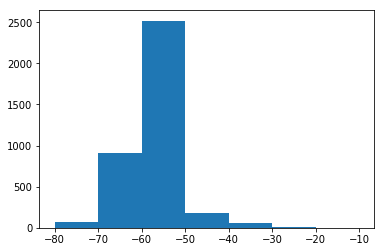

In [66]:
plt.hist(data, range=[-80,-10], bins=7)